# Seminar 6

This task is optional, and it doesn't require writing code. To make the code below work, you have to: 

1. install caffe
2. adjust caffe_root variable
3. download pretrained model for imagenet classification:
        scripts/download_model_binary.py models/bvlc_reference_caffenet
4. download auxilary data for ilsvrc12 dataset
        data/ilsvrc12/get_ilsvrc_aux.sh

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from IPython import display

caffe_root = '/Users/acid/Yandex.Disk/Documents/shad/year_3/term2/Deep_Learning/caffe/'
import sys
sys.path.append(caffe_root + 'python')

import caffe

In [2]:
MODEL_FILE = caffe_root + 'models/bvlc_reference_caffenet/deploy.prototxt'
PRETRAINED = caffe_root + 'models/bvlc_reference_caffenet/bvlc_reference_caffenet.caffemodel'

net = caffe.Classifier(MODEL_FILE, PRETRAINED)

# net.set_phase_test()
# net.set_mode_cpu()
# net.set_mean('data', np.load(caffe_root + 'python/caffe/imagenet/ilsvrc_2012_mean.npy'))

imagenet_labels_filename = caffe_root + '/data/ilsvrc12/synset_words.txt'
labels = np.loadtxt(imagenet_labels_filename, str, delimiter='\t')
labels = np.array(map(lambda s : ' '.join(s.split(' ')[1:]).split(',')[0], labels))

cap = cv2.VideoCapture(0)

Now you can test the neural network's ability to classify objects via your webcam. Notice that it can't classify people correctly because there weren't any people among 1000 classes this network was trained to recognize.

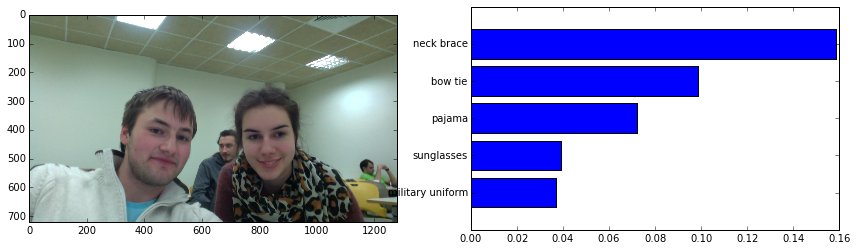

In [3]:
cap.release()
cap.open(0)
for i in range(1):
    ret, frame = cap.read()        
    if not ret:
        print 'camera failure'
        continue

    caffe_input = cv2.resize(frame, (256, 256)).astype(np.float32)

    scores = net.predict([caffe_input])

    ans = net.blobs['prob'].data[4].flatten()
    top_k = ans.argsort()[-1:-6:-1]
    prob = ans[top_k]

    plt.subplot(1,2,1)
    plt.imshow(frame[:,:,(2,1,0)])
    plt.subplot(1,2,2)
    plt.barh( range(5), prob[5::-1], align='center')
    plt.yticks(range(5), labels[top_k[::-1]], ha='right', y =100)
    plt.subplots_adjust(right=2.0)
    plt.show()